<a href="https://colab.research.google.com/github/simoneperazzoli/IGTI_MLAnalystBootcamp/blob/master/modulo_1/challenge_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [110]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (2).csv


In [111]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
challenge = pd.read_csv(nome_do_arquivo)

In [112]:
challenge.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [113]:
# 1 - No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
challenge.shape

(17379, 17)

In [114]:
challenge.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [115]:
# 2 - Quantos tipos diferentes de dados existem no dataset do desafio?
challenge.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [116]:
# 3 - Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
(challenge['temp'].isnull().sum()/ len(challenge['temp']))*100

10.000575407100524

In [117]:
# 4 - Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?
challenge_drop = challenge.dropna(subset = ['dteday'])
challenge_drop.shape

(15641, 17)

In [118]:
# 5 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?
challenge_drop['temp'].mean()

0.4969259206597582

In [119]:
# 6 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?
challenge_drop['temp'].std()

0.19297094907969137

In [120]:
# 7 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?
challenge_drop['season'].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [121]:
# 8 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?
challenge_drop['dteday'].tail()

17373    2012-12-31
17374    2012-12-31
17375    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, dtype: object

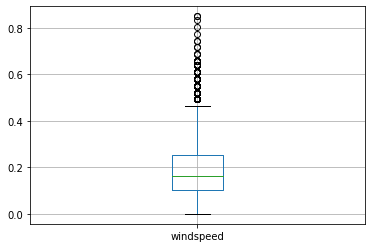

In [122]:
# 9 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

#Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
# **Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.**
#Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
#Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

challenge_drop.boxplot(column=['windspeed']);

In [123]:
# 10 - Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
# Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

#Possuem alta correlação linear positiva.
# ** Possuem baixa correlação linear negativa.**
#Possuem alta correlação linear negativa.
#Possuem baixa correlação linear positiva.

#challenge_drop.boxplot(column=['windspeed']);
import seaborn as sns
correlation = challenge_drop[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()
corr = correlation.corr()
corr.style.background_gradient(cmap='coolwarm')

,season,temp,atemp,hum,windspeed,cnt
season,1.000000,0.311273,0.319559,0.146984,-0.149802,0.179190
temp,0.311273,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.319559,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,0.146984,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.149802,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.179190,0.405867,0.403810,-0.323409,0.091747,1.000000


In [124]:
# 11 - Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. 
# Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.
linear_reg = challenge_drop[['hum','cnt', 'casual']].copy()
linear_reg = linear_reg.fillna(linear_reg.mean())
linear_reg

,hum,cnt,casual
1,0.80,40.0,8.000000
2,0.80,32.0,5.000000
3,0.75,13.0,3.000000
4,0.75,1.0,0.000000
5,0.75,1.0,0.000000
...,...,...,...
17373,0.48,122.0,10.000000
17374,0.60,119.0,11.000000
17375,0.60,89.0,35.416317
17377,0.56,61.0,13.000000


In [125]:
x = linear_reg[['hum','casual']]
Y = linear_reg[['cnt']]

In [126]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression
#Realiza a construção do modelo de regressão
reg= LinearRegression()
#x_Reshaped=x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao= reg.fit (x,Y) # encontra os coeficientes (realiza a regressão)
#realiza a previsão
previsao=reg.predict(x)

In [127]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
#parâmetros encontrados
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.4059859251122173


In [128]:
# 12 - Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). 
# Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor()
tree_regressao = regr.fit (x, Y)
previsao=regr.predict(x)
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.7098339715834964


In [129]:
# 13 - Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

#O valor encontrado pela árvore de decisão foi negativo.
# ****O valor obtido pela árvore de decisão como regressor apresenta maior R2****
#Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.
#O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.



In [130]:
# 14 - Comparando o SVM com a árvore de decisão é CORRETO afirmar:

#Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.
#SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
#Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.
# ****SVM encontra o hiperplano que gera a maior separação entre os dados. *****

In [131]:
# 15 - Com base na árvore de decisão é CORRETO afirmar:

#Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão.
# ***Pode ser utilizada para classificação e regressão.*******
#Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.
#A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.